# Diabetes: Predicting Future Diagnosis

## Introduction and Ethical Considerations

Data source: https://www.kaggle.com/mathchi/diabetes-data-set  

The Dataset:  
The Akimel O'otham, formerly known as the Pima, are an indengeous tribe living in Arizona along the Gila River.  Although the incidence rate of type 2 diabetes has been found to be high amongst North American indegenous populations, the Akimel O'otham have had the highest rates in the world since the 1960s  as well as earlier onset of the disease than the general population. The National Institute of Diabetes and Digestive and Kidney Diseases has conducted extensive research on diabetes in this community since 1965. Part of that reseach has included medical data collected on Akimel O'otham females over 21 years of age in order to study possible indicators of diabetes and then predict future onset of type 2 diabetes.   

Further background information can be found in my tableau visualization: https://public.tableau.com/app/profile/spring.chhom/viz/DiabetesPrediction_16390294417670/DiabetesPredictionintheAkimelOothamWomen   

The Analysis:  
This dataset contains variables that have already been found to be related to the onset of Type 2 Diabetes. Therefore, the task here is to determine how well these measurable variables can predict a diagnosis of diabetes in the patient within the next five years. Because we know what outcomes we are looking for, a positive or negative diagnosis of diabetes, this is an example of supervised learning, where we can train  a classification model to predict the outcome in a measured and controlled way.  The question is, how accurate and useful might this model be?  

Ethical Considerations:   
There are multiple layers of ethics to consider with this dataset and its analysis. First and foremost is the long term effects that colonization of North America has had on the indigenous populations such as the Akimel O'otham, and those effects do include the extremely high rates of Type 2 Diabetes in their community today. We all, governments, institutions and citizens, have a responsibility to do what we can to decrease these effects and increase the long term health of those affected. One way to do that is to use a dataset such as this to initiate change.   
Another consideration is to continue to build datasets such as this for future futher analysis and benficial usage. This is another way to ethically make positive change.  
Something important to consider in continuing to gather and store that data though is to make sure the individuals providing the data are fully protected in terms of privacy and safety. All personal information should be removed from the data.   
Also crucial is to minize bias in collecting, analyzing and modeling with the data. This can be tricky with such a specific dataset  but one priority is that methods of collecting, analyzing, modeling and reporting on this data should be devoid of judgement.  Bias can also come into play when choosing which variables to measure and collect, so all efforts should be made to thoroughly research and consult experts to determine the optimal choices. 
In choosing to use this dataset, I chose to keep all of this in mind and to follow it to the best of my abilities.

## Importing Libraries and Setting Up Dataframe

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# classification models to be used
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  # for separating the test and train data

# balancing data
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# evaluating models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
import scikitplot as skplt

In [94]:
# converting csv file to usable dataframe

df = pd.read_csv('diabetes.csv')
df.head()

,Number of Pregnancies,Plasma Glucose,Blood Pressure,Skin Thickness,2 Hr Serum Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
# renaming columns for ease and consistency

df.columns = ['number_of_pregnacies', 'plasma_glucose', 'blood_pressure', 'skin_thickness', 'two_hr_serum_insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
df.columns

Index(['number_of_pregnacies', 'plasma_glucose', 'blood_pressure',
       'skin_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

## Data Overview

Metadata:

number_of pregnacies: Number of times pregnant so far   
plasma_glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test   
blood_pressure: Diastolic blood pressure (mm Hg)   
skin_thickness: Triceps skin fold thickness (mm)   
two_hr_serum_insulin: 2-Hour post glucose serum insulin (mu U/ml)   
bmi: Body mass index (weight in kg/(height in m)^2)   
diabetes_pedigree_function: a measure accounting for family history and relative with diabetes   
age: Age (years)   
autcome: Class variable 0 or 1 where 0 is negative diagnosis of diabetes and 1 is positive dignosis of diabetes within 5 years

In [96]:
len(df)

768

In [97]:
# minimums of 0 and high standard deviations addressed below

df.describe()

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
df.isna().sum()

number_of_pregnacies          0
plasma_glucose                0
blood_pressure                0
skin_thickness                0
two_hr_serum_insulin          0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [99]:
(df == 0).sum(axis=0)

number_of_pregnacies          111
plasma_glucose                  5
blood_pressure                 35
skin_thickness                227
two_hr_serum_insulin          374
bmi                            11
diabetes_pedigree_function      0
age                             0
outcome                       500
dtype: int64

Some measures, plasma_glucose, blood_pressure, skin_thickness, 2_hr_serum_insulin and bmi cannot physically be 0. Incidents for glucose, bmi and blood pressure are low so they aren't like to affect results by much at all. Standard deviation is especially high for insulin measure, indicating a strong effect on the mean due to the high number of 0s. I actually tried several solutions for this and ran the classification models on each one and found that replacing the 0s with medians (or means) had better effect on classification results (accuracy, f1, cross validation) than dropping the affected rows or columns, so I decided to go with the solution below, replacing insulin and skin_thickness with medians.

## Data Cleaning

In [100]:
# used a simple numby where function to replace the 0 values with NaN
# step 1 in dealing with the 0s; there's probably a more efficient way but this is what worked for me for now

df['two_hr_serum_insulin'] = np.where(df.two_hr_serum_insulin == 0, np.NaN, df.two_hr_serum_insulin)

In [101]:
df['skin_thickness'] = np.where(df.skin_thickness == 0, np.NaN, df.skin_thickness)

In [102]:
# confirming changes

(df == 0).sum(axis=0)

number_of_pregnacies          111
plasma_glucose                  5
blood_pressure                 35
skin_thickness                  0
two_hr_serum_insulin            0
bmi                            11
diabetes_pedigree_function      0
age                             0
outcome                       500
dtype: int64

In [103]:
df.isna().sum()

number_of_pregnacies            0
plasma_glucose                  0
blood_pressure                  0
skin_thickness                227
two_hr_serum_insulin          374
bmi                             0
diabetes_pedigree_function      0
age                             0
outcome                         0
dtype: int64

In [104]:
# converting NaN values to the medians of their columns; mean was another option
# I tried both mean and median and found the classification results using mean barely changed while results using 
# median improved accuracy and f1 scores a little

df['two_hr_serum_insulin'] = df['two_hr_serum_insulin'].fillna((df['two_hr_serum_insulin'].median()))

In [105]:
df['skin_thickness'] = df['skin_thickness'].fillna((df['skin_thickness'].median()))

In [106]:
# confirming again

(df == 0).sum(axis=0)

number_of_pregnacies          111
plasma_glucose                  5
blood_pressure                 35
skin_thickness                  0
two_hr_serum_insulin            0
bmi                            11
diabetes_pedigree_function      0
age                             0
outcome                       500
dtype: int64

In [107]:
df.isna().sum()

number_of_pregnacies          0
plasma_glucose                0
blood_pressure                0
skin_thickness                0
two_hr_serum_insulin          0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [108]:
# standard deviations for means for insulina and skin thickness are much better now

df.describe()

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.108073,140.671875,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.791221,86.383060,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [109]:
df.dtypes

number_of_pregnacies            int64
plasma_glucose                  int64
blood_pressure                  int64
skin_thickness                float64
two_hr_serum_insulin          float64
bmi                           float64
diabetes_pedigree_function    float64
age                             int64
outcome                         int64
dtype: object

# Exploratory Data Analysis

Some exploratory analysis is visualized in the Tableau story but nothing that isn't covered here.

In [64]:
# checking for possible multicollinearity between the estimator variables here and in the next block
# nothing alarming since all values are low, and slightly higher value for age vs number_of_pregnancies isn't too high

corr_analysis = df.corr()
corr_analysis

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age
number_of_pregnacies,1.000000,0.129459,0.141282,0.081770,0.025047,0.017683,-0.033523,0.544341
plasma_glucose,0.129459,1.000000,0.152590,0.182037,0.409283,0.221071,0.137337,0.263514
blood_pressure,0.141282,0.152590,1.000000,0.124770,0.059146,0.281805,0.041265,0.239528
skin_thickness,0.081770,0.182037,0.124770,1.000000,0.155610,0.481701,0.102188,0.126107
two_hr_serum_insulin,0.025047,0.409283,0.059146,0.155610,1.000000,0.170060,0.126503,0.097101
bmi,0.017683,0.221071,0.281805,0.481701,0.170060,1.000000,0.140647,0.036242
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.102188,0.126503,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,0.126107,0.097101,0.036242,0.033561,1.000000


<AxesSubplot:>

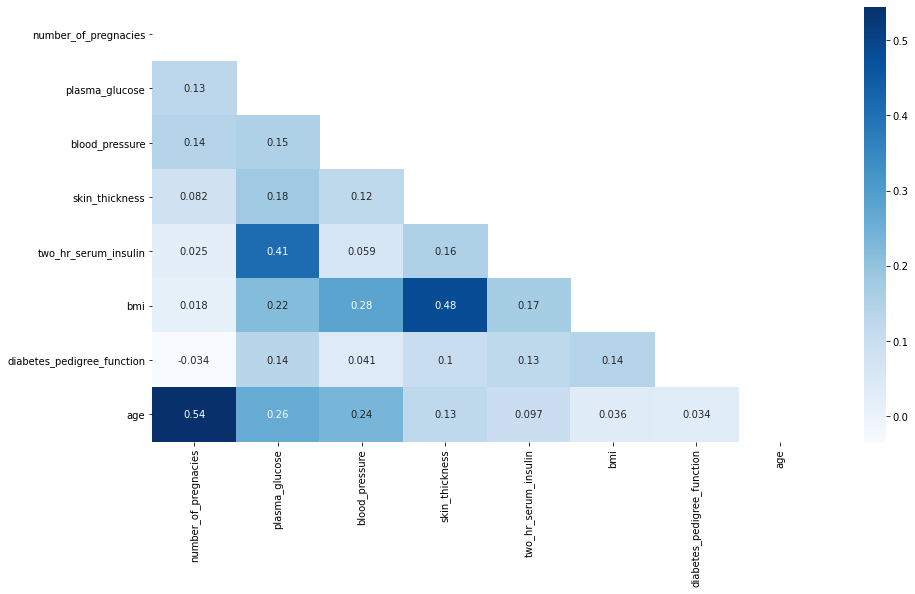

In [66]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(corr_analysis, mask=mask, annot=True,  cmap="Blues")

In [55]:
# dataset is not balanced re the two possible outcomes so this might affect the classification model results

df.value_counts(['outcome'])

outcome
0          500
1          268
dtype: int64

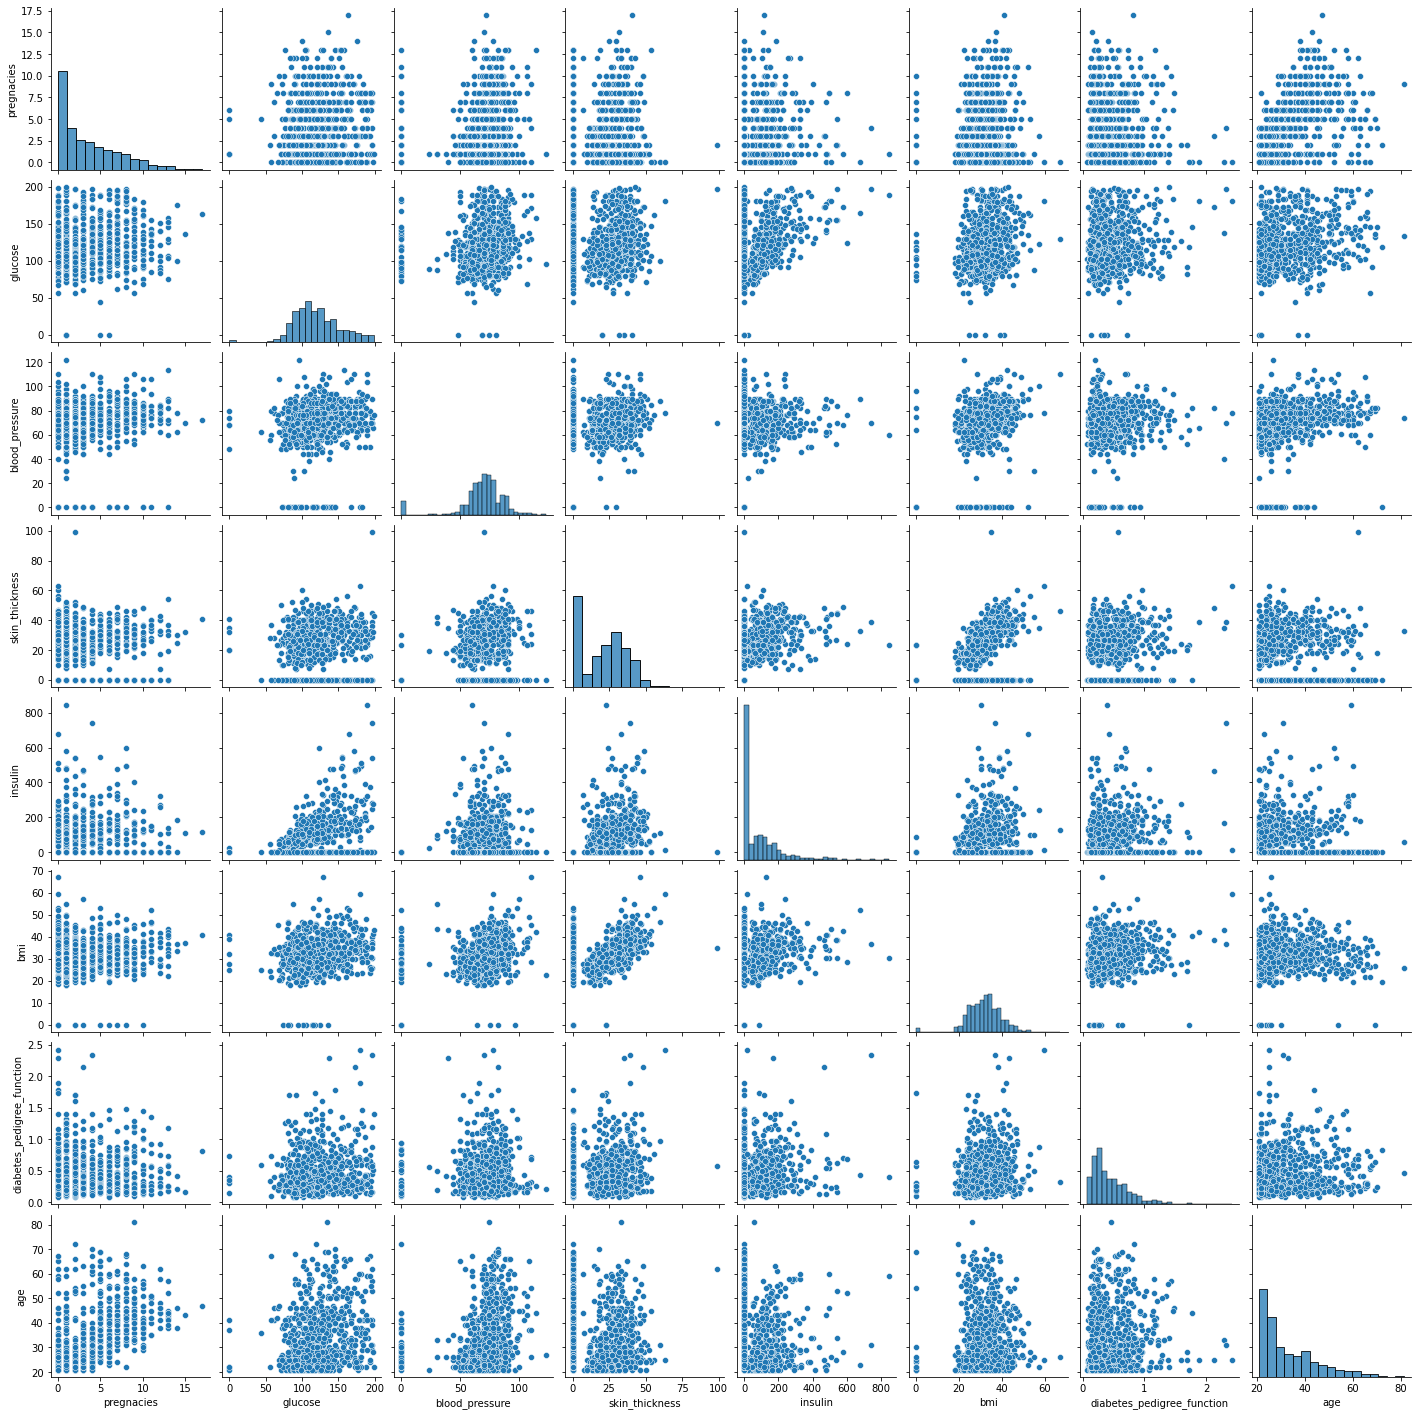

In [118]:
# looking to get an idea of general patterns with pairplots

sns.pairplot(df)

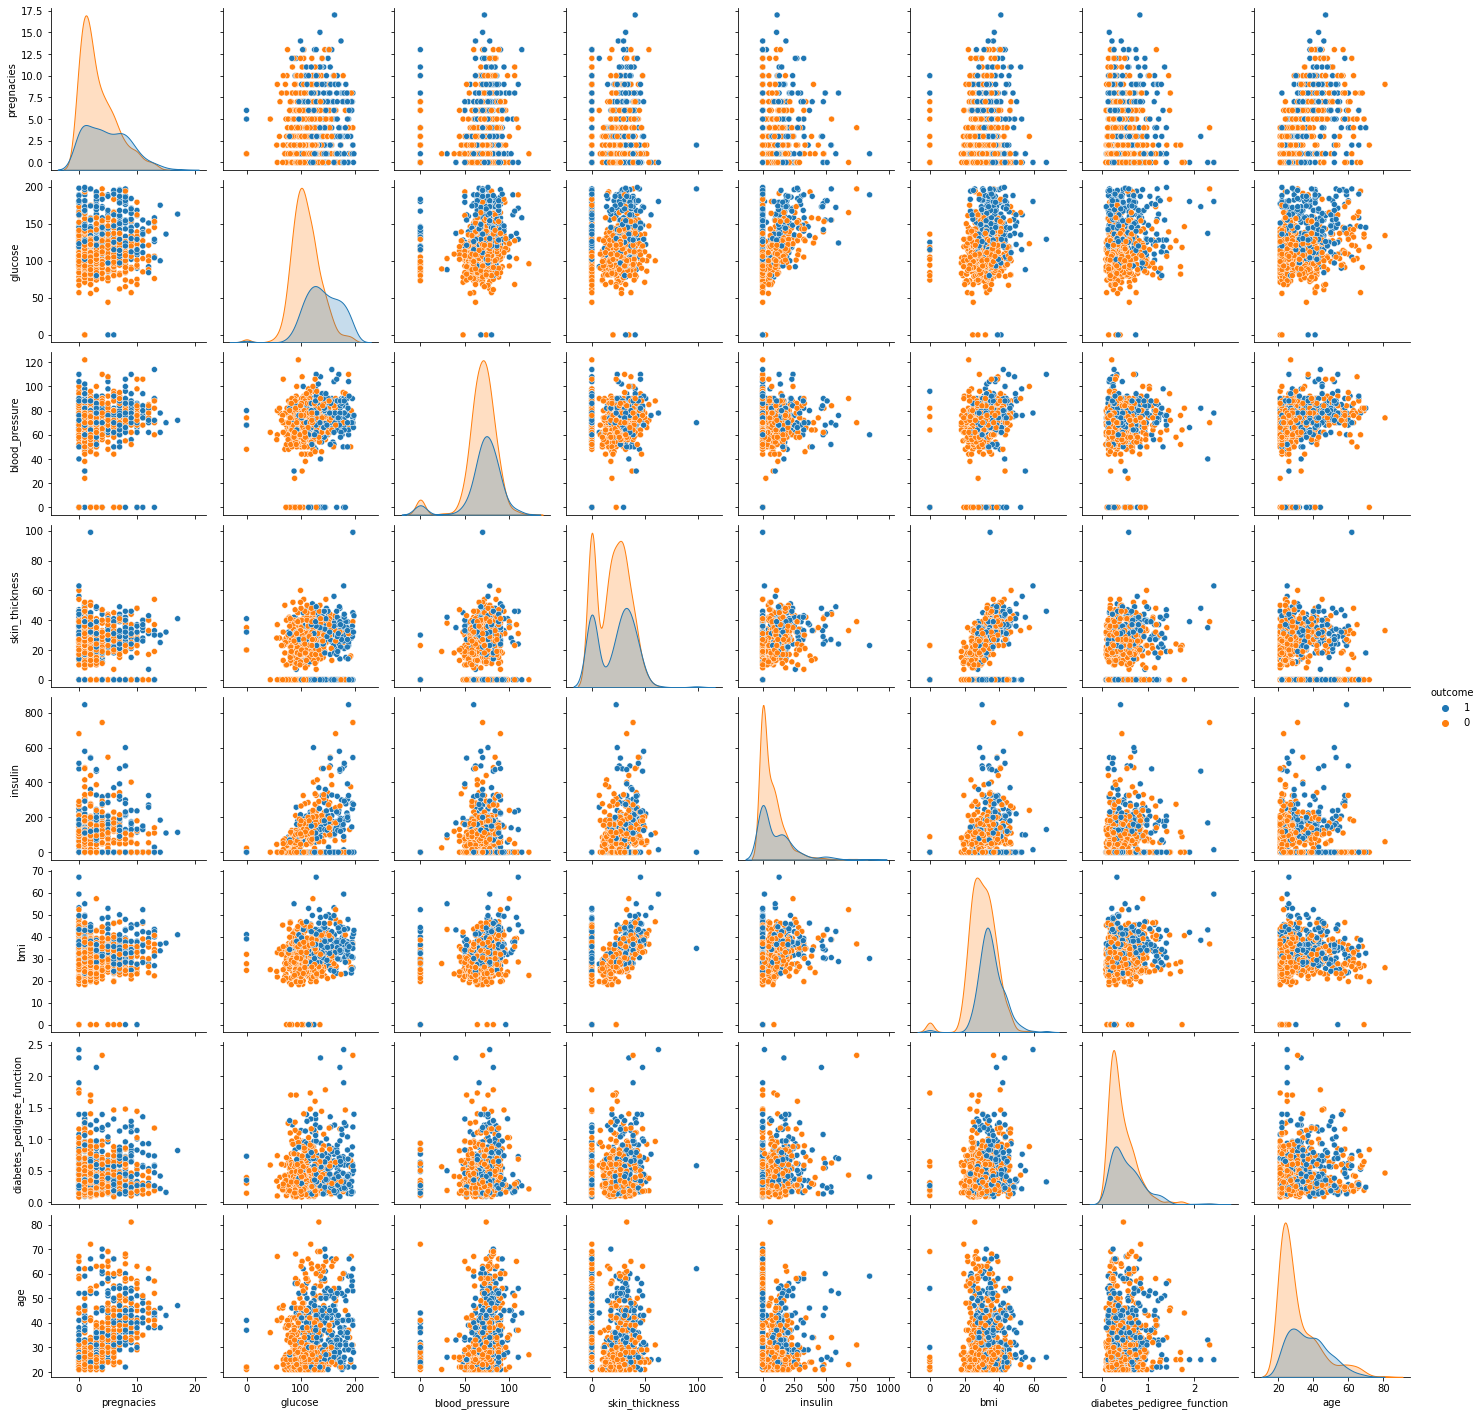

In [136]:
# trends look consistent with what is already known and assumed about the relationship between measures and outcomes

sns.pairplot(df, hue='outcome')

array([[<AxesSubplot:title={'center':'number_of_pregnacies'}>,
        <AxesSubplot:title={'center':'plasma_glucose'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'skin_thickness'}>,
        <AxesSubplot:title={'center':'two_hr_serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'diabetes_pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 1080x576 with 0 Axes>

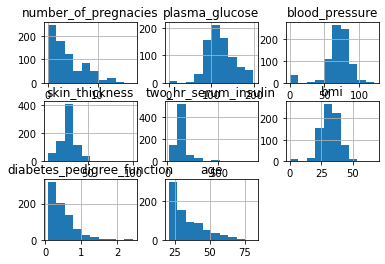

In [68]:
# histograms of each variable to look at their distribution
# these graphs seem to confirm that plasma_glucose, blood_pressure, bmi are something to look at but breaking up the
# dataframe by outcome will be able to tell me more
# even with hue for outcome on histograms in the pairplots, it's hard determine how good the variables are as estimators 
# due to the unbalanced dataset re outcome 0 vs outcome 1
# so far, I was unable to find a way to spread these out or increase their size, but they gave the main ideas anyway

df.hist()

### Further EDA after Separating the Data by Outcome

In [70]:
diabetes_negative = df[df['outcome'] == '0']
diabetes_positive = df[df['outcome'] == '1']

In [71]:
diabetes_negative.head()

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age,outcome
1,1,85,66,29.0,125.0,26.6,0.351,31,0
3,1,89,66,23.0,94.0,28.1,0.167,21,0
5,5,116,74,29.0,125.0,25.6,0.201,30,0
7,10,115,0,29.0,125.0,35.3,0.134,29,0
10,4,110,92,29.0,125.0,37.6,0.191,30,0


In [72]:
diabetes_positive.head()

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
2,8,183,64,29.0,125.0,23.3,0.672,32,1
4,0,137,40,35.0,168.0,43.1,2.288,33,1
6,3,78,50,32.0,88.0,31.0,0.248,26,1
8,2,197,70,45.0,543.0,30.5,0.158,53,1


In [73]:
len(diabetes_negative)

500

In [74]:
len(diabetes_positive)

268

In [75]:
# all means are slightly lower in the diabetes_negative group, which makes sense with what we know and indicates that
# the model might be decent
# insulin is wide ranging over both groups but more so in the diabetes_positive group (large standard deviation for mean)

diabetes_negative.describe()

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,27.726000,127.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,8.552966,74.447469,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,7.000000,15.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,22.000000,95.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,29.000000,125.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,125.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


In [76]:
diabetes_positive.describe()

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,31.686567,164.701493,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,8.662994,100.932249,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,29.000000,125.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,29.000000,125.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [77]:
# again, nothing alarming re multicollinearity in either group, as seen in tables, graphs, pairplots, below

neg_corr_analysis = diabetes_negative.corr()
neg_corr_analysis

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age
number_of_pregnacies,1.000000,0.098685,0.133096,0.124082,-0.000553,0.016495,-0.079951,0.572776
plasma_glucose,0.098685,1.000000,0.192795,0.116200,0.432903,0.131749,0.095548,0.228018
blood_pressure,0.133096,0.192795,1.000000,0.124957,0.060464,0.363178,0.027292,0.214694
skin_thickness,0.124082,0.116200,0.124957,1.000000,0.135359,0.471112,0.001853,0.153726
two_hr_serum_insulin,-0.000553,0.432903,0.060464,0.135359,1.000000,0.186139,0.163718,0.022482
bmi,0.016495,0.131749,0.363178,0.471112,0.186139,1.000000,0.070664,0.036070
diabetes_pedigree_function,-0.079951,0.095548,0.027292,0.001853,0.163718,0.070664,1.000000,0.041665
age,0.572776,0.228018,0.214694,0.153726,0.022482,0.036070,0.041665,1.000000


In [78]:
pos_corr_analysis = diabetes_positive.corr()
pos_corr_analysis

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age
number_of_pregnacies,1.000000,-0.054591,0.126963,-0.095138,-0.044055,-0.159071,-0.069195,0.444987
plasma_glucose,-0.054591,1.000000,0.068699,0.063168,0.284854,0.050418,0.026474,0.098565
blood_pressure,0.126963,0.068699,1.000000,0.097087,0.031548,0.133951,0.034522,0.262684
skin_thickness,-0.095138,0.063168,0.097087,1.000000,0.094766,0.404948,0.165431,-0.067654
two_hr_serum_insulin,-0.044055,0.284854,0.031548,0.094766,1.000000,0.022996,0.017966,0.094953
bmi,-0.159071,0.050418,0.133951,0.404948,0.022996,1.000000,0.136761,-0.188012
diabetes_pedigree_function,-0.069195,0.026474,0.034522,0.165431,0.017966,0.136761,1.000000,-0.088119
age,0.444987,0.098565,0.262684,-0.067654,0.094953,-0.188012,-0.088119,1.000000


<AxesSubplot:>

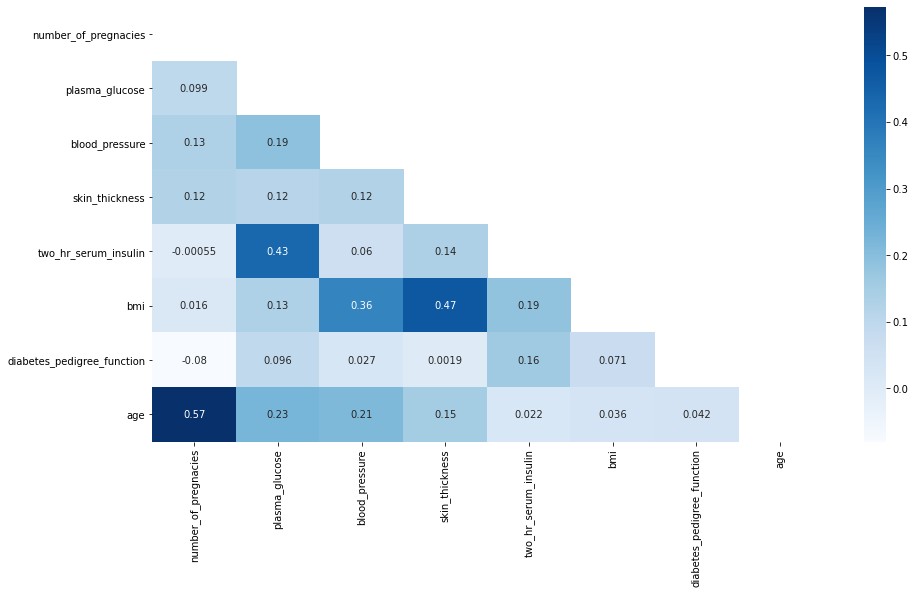

In [79]:
plt.figure(figsize=(15,8))

sns.heatmap(neg_corr_analysis, mask= mask, cmap = 'Blues', annot=True)

<AxesSubplot:>

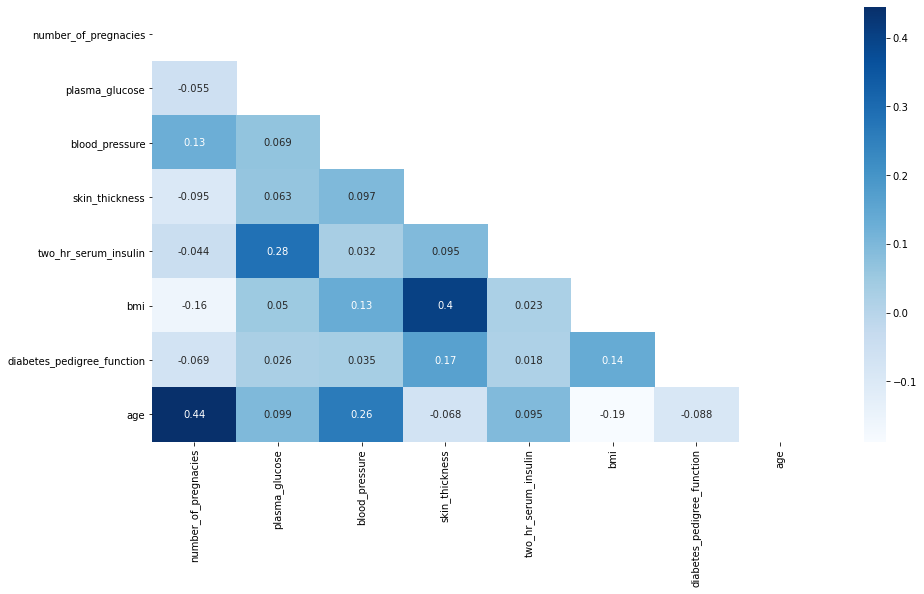

In [80]:
plt.figure(figsize=(15,8))

sns.heatmap(pos_corr_analysis, mask= mask, cmap = 'Blues', annot=True)

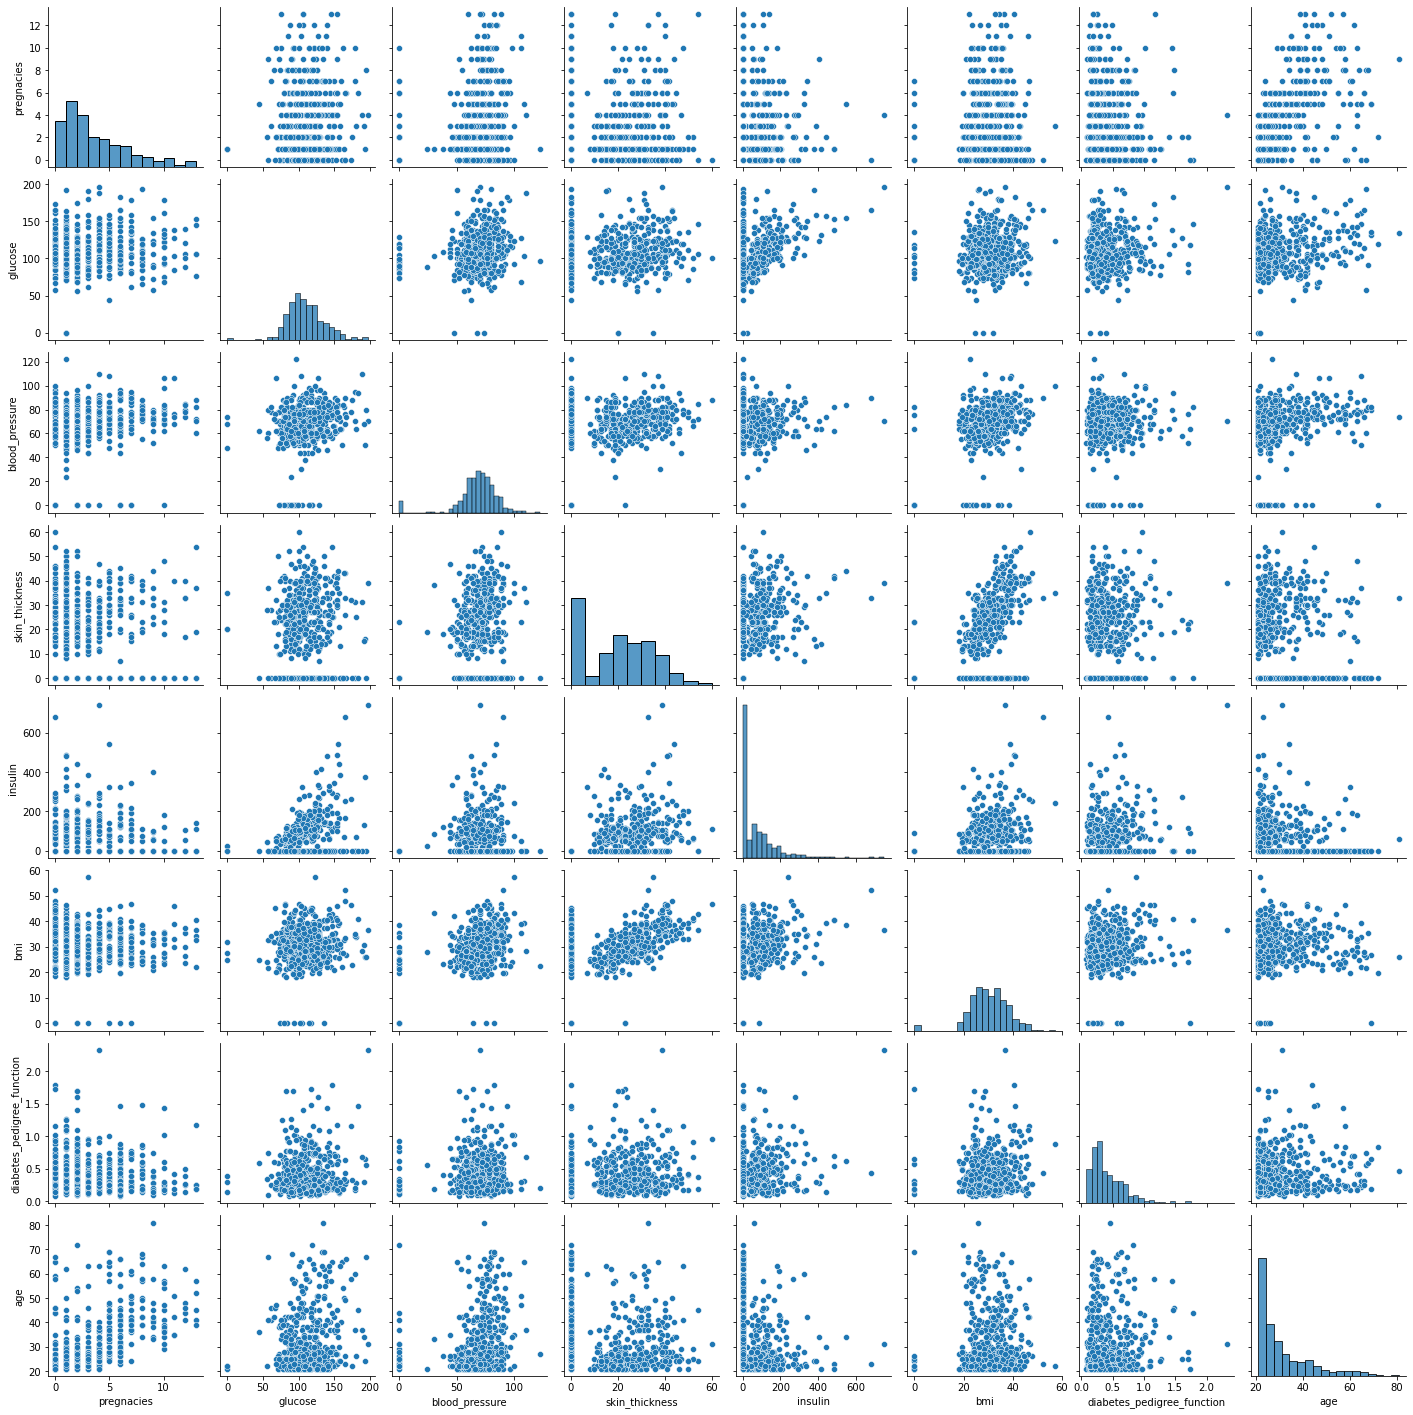

In [166]:
sns.pairplot(diabetes_negative)

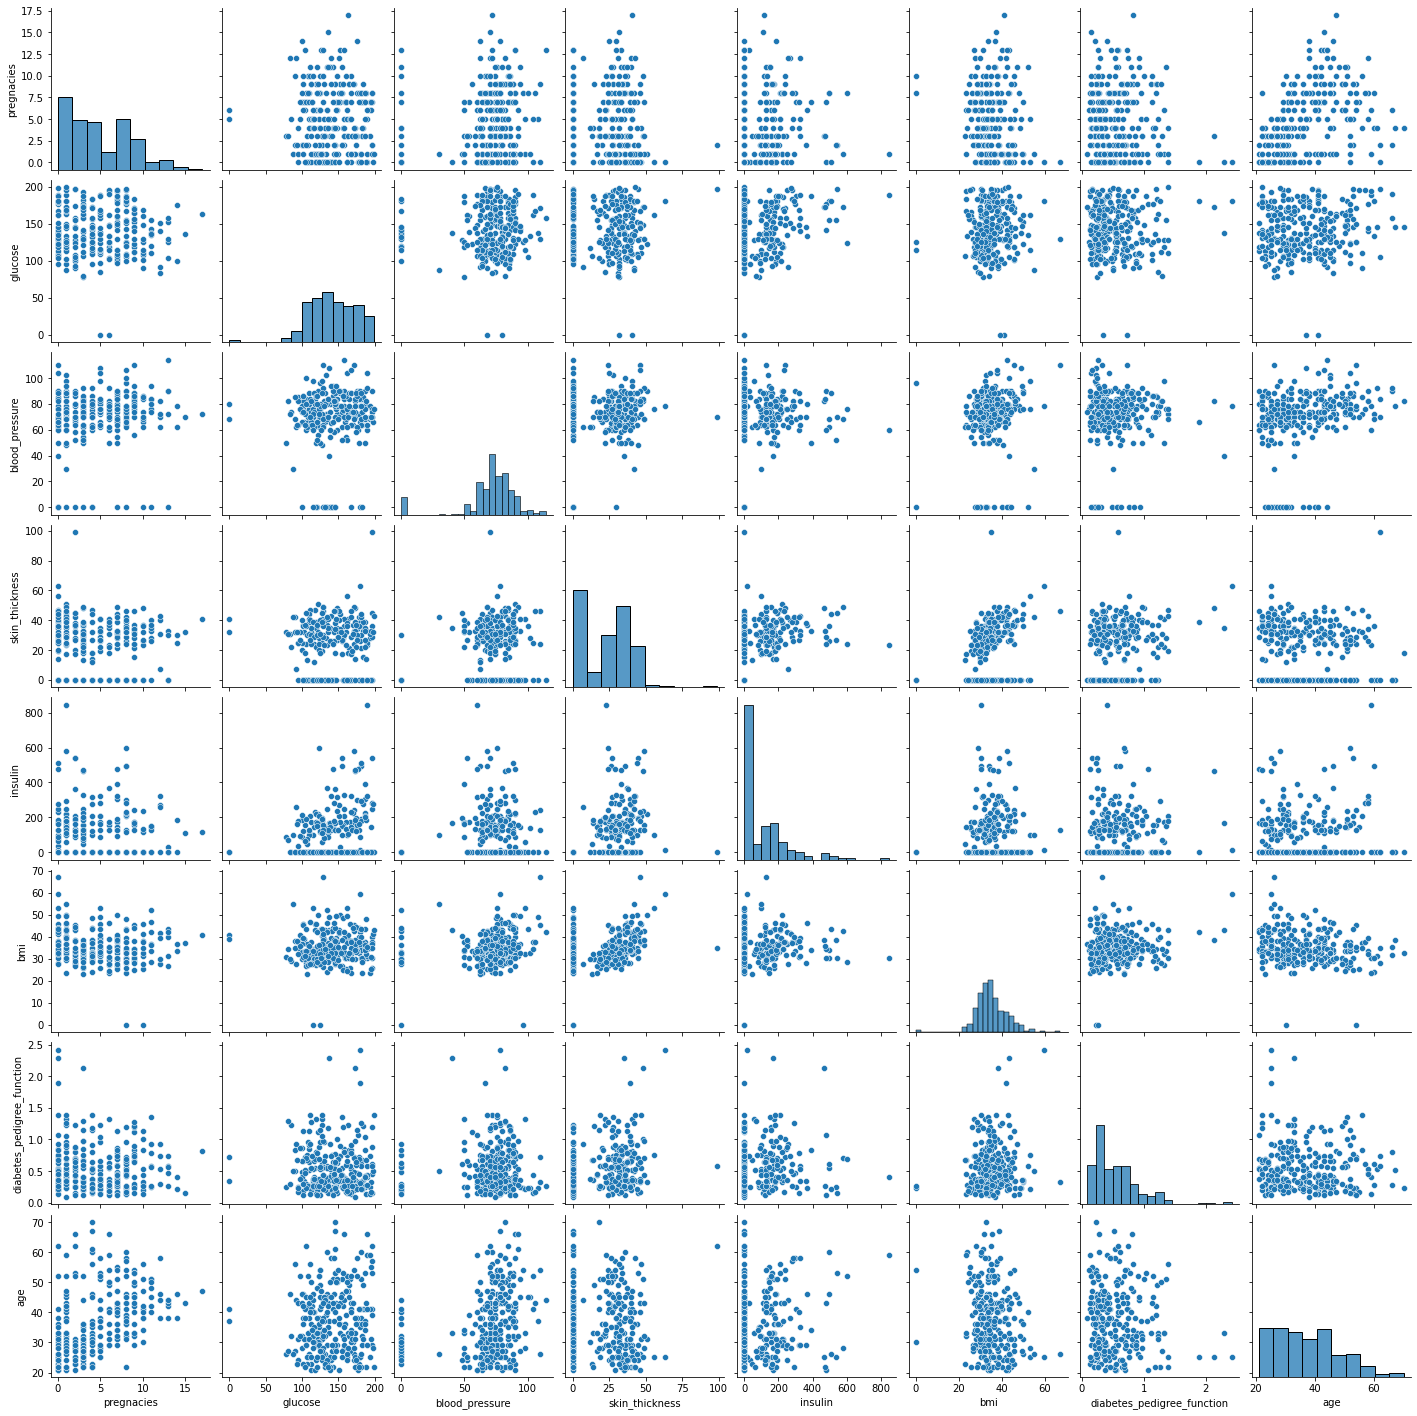

In [167]:
sns.pairplot(diabetes_positive)

array([[<AxesSubplot:title={'center':'number_of_pregnacies'}>,
        <AxesSubplot:title={'center':'plasma_glucose'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'skin_thickness'}>,
        <AxesSubplot:title={'center':'two_hr_serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'diabetes_pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

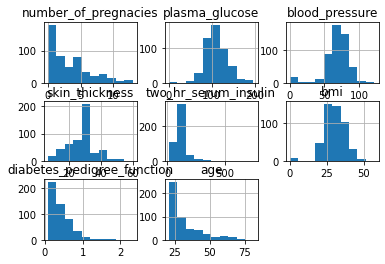

In [82]:
# a closer look at and a comparison of the histograms for each group confirms that several of these variables, 
# especially plasma_glucose, bmi, age, should be good estimators in creating a classification model for future
# diabetes diagnosis
# this is seen in the skew and distribution differences, where variables skew to the right (higher values) for some
# of the variables in the positive_diabetes group

diabetes_negative.hist()

array([[<AxesSubplot:title={'center':'number_of_pregnacies'}>,
        <AxesSubplot:title={'center':'plasma_glucose'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'skin_thickness'}>,
        <AxesSubplot:title={'center':'two_hr_serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'diabetes_pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

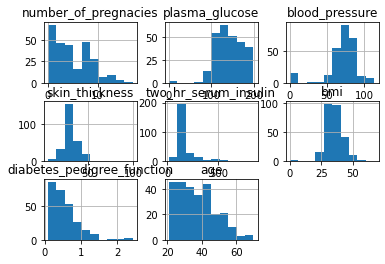

In [83]:
diabetes_positive.hist()

# Classification Modeling

## Preparing the Data

### Separating the Train and Test set of the Data

In [110]:
# separating the estimator variables into the X dataframe by dropping the outcome (what is being predicted) column

X = df.drop(labels = 'outcome', axis = 1)

In [111]:
X

,number_of_pregnacies,plasma_glucose,blood_pressure,skin_thickness,two_hr_serum_insulin,bmi,diabetes_pedigree_function,age
0,6,148,72,35.0,125.0,33.6,0.627,50
1,1,85,66,29.0,125.0,26.6,0.351,31
2,8,183,64,29.0,125.0,23.3,0.672,32
3,1,89,66,23.0,94.0,28.1,0.167,21
4,0,137,40,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63
764,2,122,70,27.0,125.0,36.8,0.340,27
765,5,121,72,23.0,112.0,26.2,0.245,30
766,1,126,60,29.0,125.0,30.1,0.349,47


In [112]:
# the outcome, being predicted, is put into the y dataframe

y = df['outcome']

In [113]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [114]:
# randomly separating the data into train and test sets and then confirming their shapes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [115]:
X_train.shape

(537, 8)

In [116]:
X_test.shape

(231, 8)

In [117]:
y_train.shape

(537,)

### Weighting the Unbalanced Data

Not shown in this notebook is how I ran the models and starting evaluating the results, which weren't that impressive. With some guidance from an instructor, I learned that the unbalanced outcome counts might be contributing to that so I ran the following code to balance the weight for each outcome and then re-ran the classification models while including the resulting class_weight values.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\sprin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{'class_weight': {0: 0.34824120603015074, 1: 0.6517587939698493}}


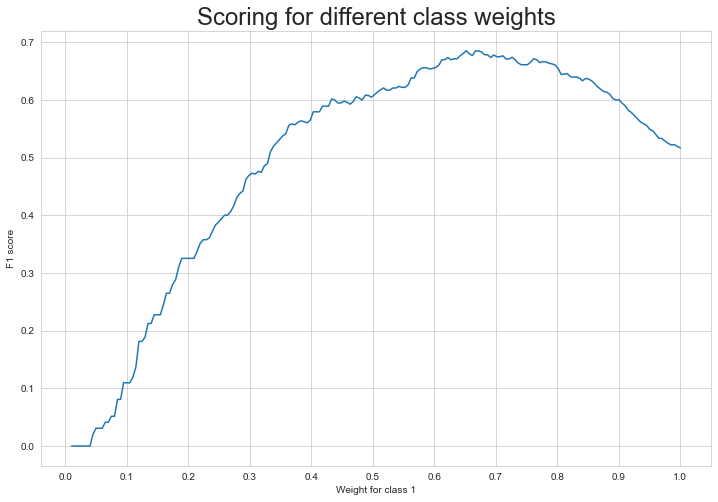

In [118]:
# classification model
lr = LogisticRegression(solver='newton-cg')

# setting the range for class weights between 0 and 100 and creating 200 instancescreating 200 instances
# ie. running the model on each combo and find the optimal weighting
 
weights = np.linspace(0.0,0.99,200) 

# creating a dictionary grid for grid search results

param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# fitting grid search to the train data with 5 folds (default number
# n_jobs - using all of my computer cores rather than just one since this is a heavy computation
# scoring - how each model of 100 models is evaluated  - using f1 score 
# verbose - gives the score

gridsearch = GridSearchCV(estimator= lr, param_grid= param_grid, cv=StratifiedKFold(), n_jobs=-1, scoring='f1', verbose=2).fit(X_train, y_train)

# ploting the score found for the different values of weight
# visualize the results - f1 on y, 0 to 200 on x - shows which weighting has highest f1 score

sns.set_style('whitegrid')
plt.figure(figsize=(12,8)) 
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

# print the optimum class_weights as shown in graph
print(gridsearch.best_params_)

## Classification Models

### Logistic Regression Model

In [119]:
# including the new class_weights and fitting the logistic regression model to the train set of data

lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.3134170854271357, 1: 0.6865829145728644}, random_state=17, max_iter=3000)
lr.fit(X_train, y_train)

# predicting the outcome (y)

y_pred = lr.predict(X_test)

# looking at the accuracy score of the model

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7705627705627706


In [120]:
# looking more closely at the accuracy of the model, in particular the scores for the diabetes positive outcome and
# the f1 score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       150
           1       0.65      0.77      0.70        81

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.78      0.77      0.77       231



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

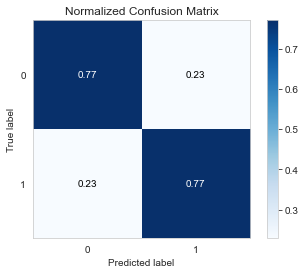

In [121]:
# plotting a visual look at the results above, normalized to percents in order to more easily interpret the results

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [122]:
# cross validation - good to use when the amount of data isn't that much
# uses all of the data as train and test, in folds
# then calculate the mean of those results (one for each fold)

print(cross_val_score(lr, X_train, y_train, cv=5))
print(np.mean(cross_val_score(lr, X_train, y_train, cv=5)))

[0.71296296 0.75925926 0.71962617 0.75700935 0.76635514]
0.7430425752855659


In [123]:
print(cross_val_score(lr, X_train, y_train, cv=10))
print(np.mean(cross_val_score(lr, X_train, y_train, cv=10)))

[0.62962963 0.7962963  0.75925926 0.72222222 0.68518519 0.75925926
 0.87037037 0.64150943 0.69811321 0.81132075]
0.7373165618448638


### Decision Tree Model

In [124]:
# similar procedure for each model

dt = DecisionTreeClassifier(class_weight={0: 0.3134170854271357, 1: 0.6865829145728644})
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7705627705627706


In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       150
           1       0.68      0.65      0.67        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

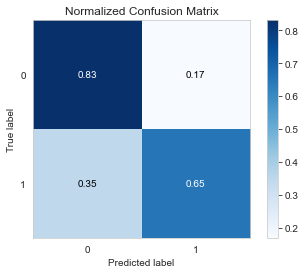

In [126]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [127]:
print(cross_val_score(dt, X_train, y_train, cv=5))
print(np.mean(cross_val_score(dt, X_train, y_train, cv=5)))

[0.7037037  0.67592593 0.75700935 0.71962617 0.69158879]
0.7058324679820006


<AxesSubplot:title={'center':'Feature Importance'}>

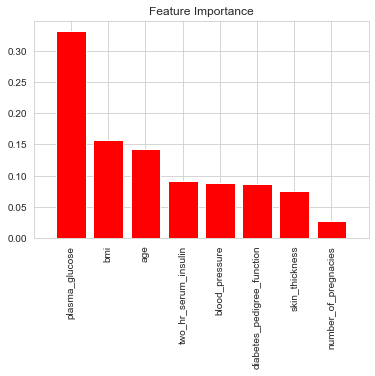

In [128]:
# this model also allows a look at how each estimator (column) is contributing
# can try dropping some columns based on this result and rerun the model (hyper parameter tuning)
# especially usefull when there are a high number of variables

feature_names = X.columns

skplt.estimators.plot_feature_importances(dt, feature_names=feature_names, x_tick_rotation=90)

### Random Forest Model

In [131]:
rf = RandomForestClassifier(class_weight={0: 0.3134170854271357, 1: 0.6865829145728644}, n_estimators=10, random_state=17)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7489177489177489


In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

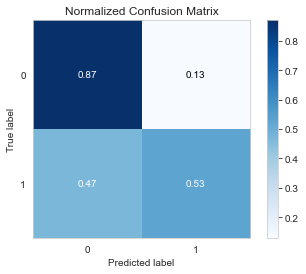

In [133]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [134]:
print(cross_val_score(rf, X_train, y_train, cv=5))
print(np.mean(cross_val_score(rf, X_train, y_train, cv=5)))

[0.74074074 0.71296296 0.80373832 0.78504673 0.77570093]
0.763637937002423


<AxesSubplot:title={'center':'Feature Importance'}>

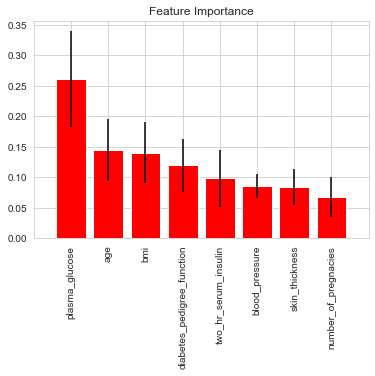

In [137]:
# this option is available in the random forest model too

feature_names = X.columns

skplt.estimators.plot_feature_importances(rf, feature_names=feature_names, x_tick_rotation=90)

### SVM: Support Vector Machine

In [138]:
svm = SVC(class_weight={0: 0.3134170854271357, 1: 0.6865829145728644})
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6883116883116883


In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       150
           1       0.54      0.74      0.62        81

    accuracy                           0.69       231
   macro avg       0.68      0.70      0.68       231
weighted avg       0.73      0.69      0.70       231



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

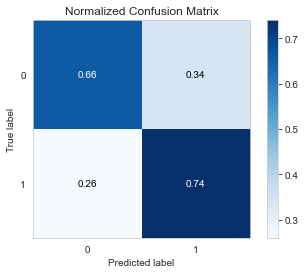

In [140]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [141]:
print(cross_val_score(svm, X_train, y_train, cv=5))
print(np.mean(cross_val_score(svm, X_train, y_train, cv=5)))

[0.72222222 0.68518519 0.70093458 0.74766355 0.71962617]
0.7151263412945656


### KNN: k-Nearest Neighbours

In [142]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)\

print(accuracy_score(y_test, y_pred))

0.7229437229437229


              precision    recall  f1-score   support

           0       0.79      0.78      0.79       150
           1       0.60      0.62      0.61        81

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

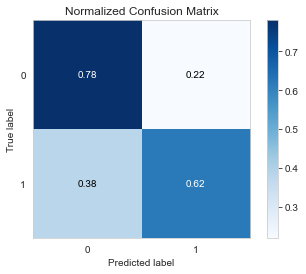

In [143]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [144]:
print(cross_val_score(knn, X_train, y_train, cv=5))
print(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

[0.69444444 0.66666667 0.71028037 0.72897196 0.72897196]
0.7058670820353063


I then examined each model's results to decide on which would be considered to be the best predictor of future diabetes diagnosis outcome.  I especially looked at the cross validation scores, f1 scores and precision and recall to consider which model was most dependable at giving both true positive and true negative scores.

# Conclusions and Recomendations

I determined that the Logistic Regression model gave the most dependable predictions of diabetes diagnosis outcomes since it had the highest rates of both true positives and true negatives. The true positive were especially important since those would be the patients that health care providers would want to focus the most preventative measures on in efforts to delay or prevent the onset of diabetes. This model also had the highest accuracy over all and one of the highest cross validation scores. I would recommend that this model can be used to implement preventative measures in patients but that all patients should still be  monitored regardless, especially if their test results for the individual measurable variables indicate so.

# Next Steps

Due to time constraints and lack of experience, I decided to leave hyperparameter tuning and re-running models to see if I can get better results for future fine tuning of these classification models.     

Look deeper into the variables in this dataset with regression modeling.

Look for new datasets, possibly using additional/different variables, on the Akimel O'otham to see if better modeling can be created.

# References

Data source: https://www.kaggle.com/mathchi/diabetes-data-set  

https://care.diabetesjournals.org/content/27/12/2806  
http://www.gilariver.org/ 
https://www.euro.who.int/en/health-topics/noncommunicable-diseases/diabetes/data-and-statistics  
https://diabetes.diabetesjournals.org/content/64/12/3993   
https://en.wikipedia.org/wiki/Pima_people  
https://www.youtube.com/watch?v=roMElEC83IU   
https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html#  
https://www.cdc.gov/diabetes/data/index.html  
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/  
https://www.youtube.com/watch?v=6NFT31grPf0  
https://www.youtube.com/watch?v=pN4HqWRybwk  
https://diabetes.diabetesjournals.org/content/64/12/3993  
https://www.youtube.com/watch?v=7h0OhM_NJz4  
https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/  